In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.ndimage as simage
import os

Prior to running anything, you'll need to open your `minian` environment, load in the appropriate variables with `utilities.open_minian`, and then convert them to numpy format

In [23]:
def plot_traces_rough(C, n_per_group=10, S=None, cell_labels=None):
    """Plot ALL neuron traces in a super rough way with 10 cells per figure"""
    ncells = C.shape[0]
    ngroups = np.ceil(ncells/n_per_group).astype(int)
    if cell_labels is None:
        cell_labels = range(ncells)
    for group in range(ngroups):
        cells = range(group*n_per_group, np.min(((group + 1)*n_per_group+1, ncells)))
        fig, ax = plt.subplots(n_per_group, 1, sharex=True, figsize=(16, 16))
        for cell, a in zip(cells, ax):
            a.plot(C[cell])
            
            # Plot spikes if given as an input
            if S is not None:
                spikes = S[cell].astype(bool)
                a.plot(np.where(spikes)[0], C[cell][spikes], 'r.')
            a.set_ylabel('Cell # ' + str(cell_labels[cell]))
            sns.despine(ax=a)
    

In [3]:
def plot_all_cells(A, cell_ids=None):
    """Plot all cell ROIs with optional labels (cell_ids = list of cell numbers corresponding to each mask in A)"""
    fig, ax = plt.subplots()
    sns.heatmap((A_use > 0).sum(axis=0), ax=ax, cmap='viridis', cbar=False, 
                xticklabels=False, yticklabels=False)
    if cell_ids is not None:
        for cell, roi in zip(cell_ids, A):
            com = simage.center_of_mass(roi)
            ax.text(com[1], com[0], str(cell), color='r')
    
    return ax

In [20]:
# Load in data: A, C, and S variabels
basedir = '/data/Working/Alternation/Recording_Rats/Rat698/2021_07_12/2_alternation/Miniscope_combined/minian'
A = np.load(os.path.join(basedir, 'A.npy'))
C = np.load(os.path.join(basedir, 'C.npy'))
S = np.load(os.path.join(basedir, 'S.npy'))

In [21]:
# Filter out any cells you want here
put_cells = [2, 3, 5, 18, 31, 32, 34, 35, 40, 43, 44, 64, 65, 85, 87, 100, 114, 116, 117, 118, 121]
if put_cells is not None:
    A_use, C_use, S_use = A[put_cells], C[put_cells], S[put_cells]
else:
    A_use, C_use, S_use = A, C, S    

<AxesSubplot:>

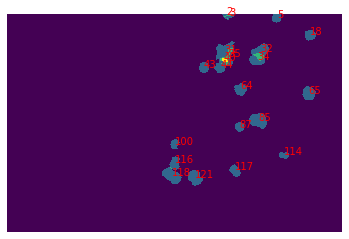

In [8]:
# Plot cell masks
plot_all_cells(A_use, cell_ids=put_cells)

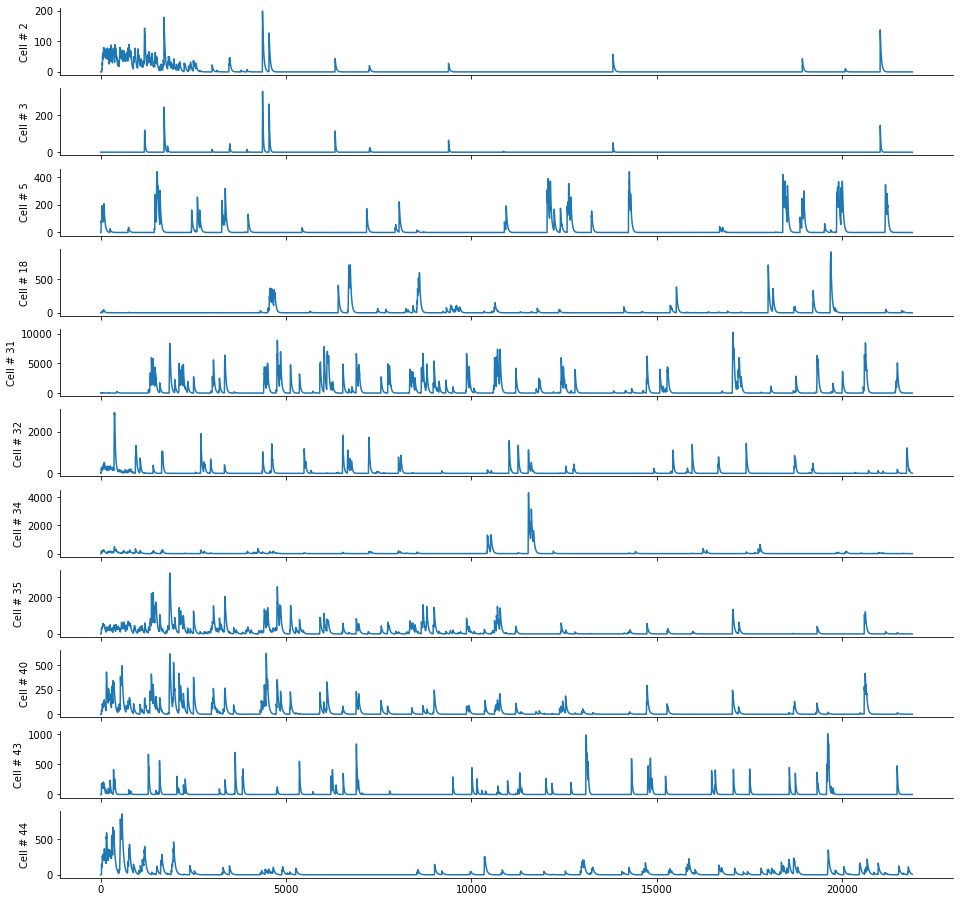

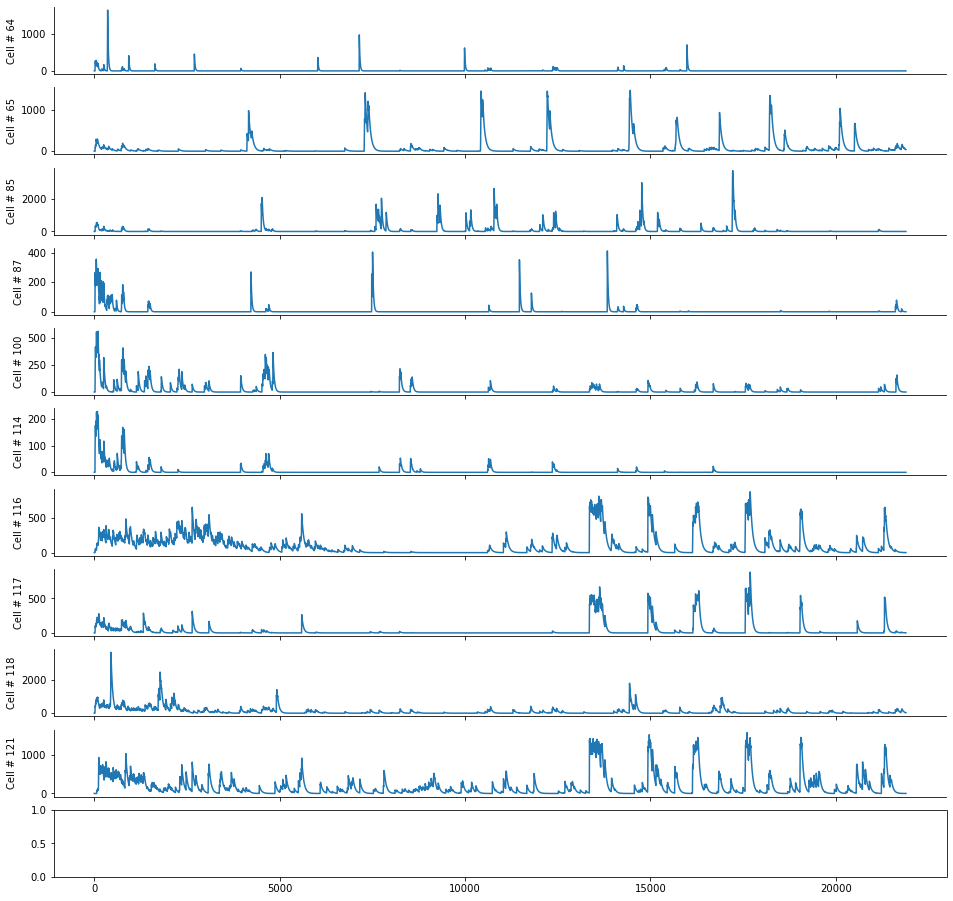

In [24]:
plot_traces_rough(C_use, n_per_group=11, cell_labels=put_cells)